In [1]:
# imports
import seaborn as sns
from matplotlib import pyplot as plt
import xarray
import h5py 
import pandas as pd

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# imports
from importlib import reload

from ulmo import io as ulmo_io
import numpy as np
from ulmo import io as ulmo_io
from ulmo.viirs import io as viirs_io
from ulmo.viirs import extract as viirs_extract
from ulmo.plotting import plotting
from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

# MODIS Tables

In [3]:
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


In [28]:
len(modis_tbl)

12493761

In [4]:
modis2012 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2012_95clear_128x128_preproc_std.h5')
modis2013 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2013_95clear_128x128_preproc_std.h5')
modis2014 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2014_95clear_128x128_preproc_std.h5')
modis2015 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2015_95clear_128x128_preproc_std.h5')
modis2016 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2016_95clear_128x128_preproc_std.h5')
modis2017 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2017_95clear_128x128_preproc_std.h5')
modis2018 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2018_95clear_128x128_preproc_std.h5')
modis2019 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2019_95clear_128x128_preproc_std.h5')

In [5]:
modis_tbl12 = modis_tbl[modis2012[0][0]:modis2012[0][-1]]
modis_tbl13 = modis_tbl[modis2013[0][0]:modis2013[0][-1]]
modis_tbl14 = modis_tbl[modis2014[0][0]:modis2014[0][-1]]
modis_tbl15 = modis_tbl[modis2015[0][0]:modis2015[0][-1]]
modis_tbl16 = modis_tbl[modis2016[0][0]:modis2016[0][-1]]
modis_tbl17 = modis_tbl[modis2017[0][0]:modis2017[0][-1]]
modis_tbl18 = modis_tbl[modis2018[0][0]:modis2018[0][-1]]
modis_tbl19 = modis_tbl[modis2019[0][0]:modis2019[0][-1]]

In [ ]:
list_modis = [modis_tbl12,modis_tbl13,modis_tbl14,modis_tbl15,modis_tbl16,modis_tbl17,modis_tbl18,modis_tbl19]
LLs_m = []
datetime_m = []

for i in list_modis:
    LLs_m.append(i.LL.values)
    datetime_m.append(i.datetime)
    
all_modis = np.concatenate(LLs_m[0:9])
all_modis_date = np.concatenate(datetime_m[0:9])
dates_m = pd.DatetimeIndex(all_modis_date)

print(all_modis[0:N10])
print(all_modis_date)

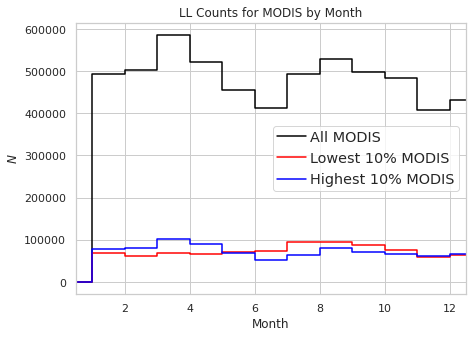

In [131]:
# Load db
anom_db_m = all_modis
N10_m = int(np.round(0.1*len(all_modis)))
i10_m = np.argsort(all_modis)[0:N10]
ih10_m = np.argsort(all_modis)[-N10:]

# Months
months_m = np.array([idate.month for idate in dates_m])

# Bin em
ibins_m = np.arange(14)
H_all_m, bins_m = np.histogram(months_m, bins=ibins_m)
bincentres_m = [(bins_m[i] + bins_m[i + 1]) / 2. for i in range(len(bins_m) - 1)]
H_10_m, _ = np.histogram(months_m[i10_m], bins=ibins_m) # Outliers
H_h10_m, _ = np.histogram(months_m[ih10_m], bins=ibins_m) # Inliers

# Figure time
fig = plt.figure(figsize=(7, 5))
#plt.clf()
ax = plt.gca()

for H, clr, cat in zip([H_all_m, H_10_m, H_h10_m], ['k', 'r', 'b'], ['All MODIS', 'Lowest 10% MODIS', 'Highest 10% MODIS']):
    plt.step(bincentres_m, H, where='mid', color=clr, label='{}'.format(cat))

    # Labels
ax.set_ylabel(r'$N$')
ax.set_xlabel('Month')
#ax.set_yscale('log')
ax.minorticks_on()
plt.xlim(0.5,12.5)
plt.title('LL Counts for MODIS by Month')

legend = plt.legend(scatterpoints=1, borderpad=0.3, handletextpad=0.3, fontsize='large', numpoints=1)

# Layout and save
# plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
#plt.savefig(outfile, dpi=300)
plt.show()
#plt.close()
#print('Wrote {:s}'.format(outfile))

# VIIRS Tables 

In [6]:
viirs_tbl12 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2012_std.parquet')
viirs_tbl13 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_std.parquet')
viirs_tbl14 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2014_std.parquet')
viirs_tbl15 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2015_std.parquet')
viirs_tbl16 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2016_std.parquet')
viirs_tbl17 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2017_std.parquet')
viirs_tbl18 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2018_std.parquet')
viirs_tbl19 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2019_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2012_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2014_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2015_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2016_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2017_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2018_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2019_std.parquet


In [103]:
list_viirs = [viirs_tbl12,viirs_tbl13,viirs_tbl14,viirs_tbl15,viirs_tbl16,viirs_tbl17,viirs_tbl18,viirs_tbl19]
LLs = []
datetime = []

for i in list_viirs:
    LLs.append(i.LL.values)
    datetime.append(i.datetime)
    
all_viirs = np.concatenate(LLs[0:9])
all_viirs_date = np.concatenate(datetime[0:9])
dates = pd.DatetimeIndex(all_viirs_date)

print(all_viirs[0:N10])
print(all_viirs_date)

[  152.32068     98.993835   183.89246  ...  -781.75476  -1182.9355
  -350.2193  ]
['2012-02-01T00:00:00.000000000' '2012-02-01T00:00:00.000000000'
 '2012-02-01T00:00:00.000000000' ... '2019-12-31T23:40:00.000000000'
 '2019-12-31T23:40:00.000000000' '2019-12-31T23:40:00.000000000']


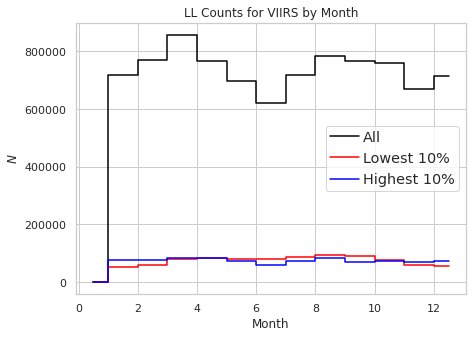

In [110]:
# Load db
anom_db = all_viirs
N10 = int(np.round(0.1*len(all_viirs)))
i10 = np.argsort(all_viirs)[0:N10]
ih10 = np.argsort(all_viirs)[-N10:]

# Months
months = np.array([idate.month for idate in dates])

# Bin em
ibins = np.arange(14)
H_all, bins = np.histogram(months, bins=ibins)
bincentres = [(bins[i] + bins[i + 1]) / 2. for i in range(len(bins) - 1)]
H_10, _ = np.histogram(months[i10], bins=ibins) # Outliers
H_h10, _ = np.histogram(months[ih10], bins=ibins) # Inliers

# Figure time
fig = plt.figure(figsize=(7, 5))
#plt.clf()
ax = plt.gca()

for H, clr, cat in zip([H_all, H_10, H_h10], ['k', 'r', 'b'], ['All', 'Lowest 10%', 'Highest 10%']):
    plt.step(bincentres, H, where='mid', color=clr, label='{}'.format(cat))

    # Labels
ax.set_ylabel(r'$N$')
ax.set_xlabel('Month')
#ax.set_yscale('log')
ax.minorticks_on()
plt.title('LL Counts for VIIRS by Month')

legend = plt.legend(scatterpoints=1, borderpad=0.3, handletextpad=0.3, fontsize='large', numpoints=1)

# Layout and save
# plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
#plt.savefig(outfile, dpi=300)
plt.show()
#plt.close()
#print('Wrote {:s}'.format(outfile))

# Histogram Comparison 

In [134]:
mon = {'mod_all': H_all_m,
            'vir_all': H_all,
       'mod_low10': H_10_m,
       'mod_high10': H_h10_m,
       'vir_low10': H_10,
       'vir_high10': H_h10
        }

df_LL = pd.DataFrame(mon, columns = ['mod_all', 'vir_all','mod_low10','mod_high10','vir_low10','vir_high10'])

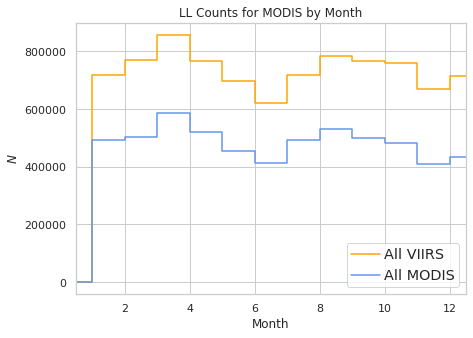

In [132]:
# Figure time
fig = plt.figure(figsize=(7, 5))
#plt.clf()
ax = plt.gca()

for H, clr, cat in zip([H_all, H_all_m], ['orange','cornflowerblue'], ['All VIIRS', 'All MODIS']):
    plt.step(bincentres_m, H, where='mid', color=clr, label='{}'.format(cat))

    # Labels
ax.set_ylabel(r'$N$')
ax.set_xlabel('Month')
#ax.set_yscale('log')
ax.minorticks_on()
plt.xlim(0.5,12.5)
plt.title('LL Counts for MODIS by Month')

legend = plt.legend(scatterpoints=1, borderpad=0.3, handletextpad=0.3, fontsize='large', numpoints=1)

# Layout and save
# plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
#plt.savefig(outfile, dpi=300)
plt.show()

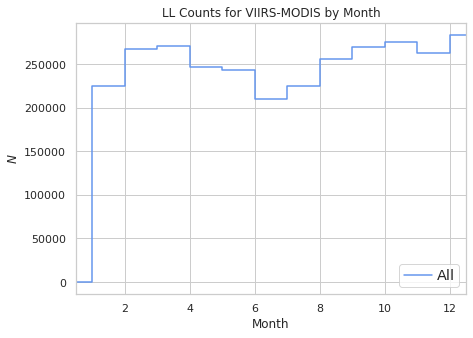

In [139]:
# Figure time
fig = plt.figure(figsize=(7, 5))
#plt.clf()
ax = plt.gca()

for H, clr, cat in zip([H_all-H_all_m], ['cornflowerblue'], ['All']):
    plt.step(bincentres_m, H, where='mid', color=clr, label='{}'.format(cat))

    # Labels
ax.set_ylabel(r'$N$')
ax.set_xlabel('Month')
#ax.set_yscale('log')
ax.minorticks_on()
plt.xlim(0.5,12.5)
plt.title('LL Counts for VIIRS-MODIS by Month')

legend = plt.legend(scatterpoints=1, borderpad=0.3, handletextpad=0.3, fontsize='large', numpoints=1)

# Layout and save
# plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
#plt.savefig(outfile, dpi=300)
plt.show()

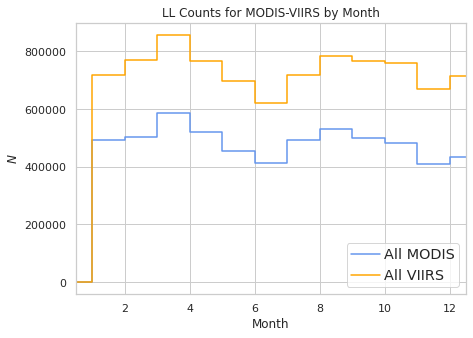

In [135]:
# Figure time
fig = plt.figure(figsize=(7, 5))
#plt.clf()
ax = plt.gca()

for H, clr, cat in zip([df_LL.mod_all,df_LL.vir_all], ['cornflowerblue','orange'], ['All MODIS','All VIIRS']):
    plt.step(bincentres_m, H, where='mid', color=clr, label='{}'.format(cat))

    # Labels
ax.set_ylabel(r'$N$')
ax.set_xlabel('Month')
#ax.set_yscale('log')
ax.minorticks_on()
plt.xlim(0.5,12.5)
plt.title('LL Counts for MODIS-VIIRS by Month')

legend = plt.legend(scatterpoints=1, borderpad=0.3, handletextpad=0.3, fontsize='large', numpoints=1)

# Layout and save
# plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
#plt.savefig(outfile, dpi=300)
plt.show()

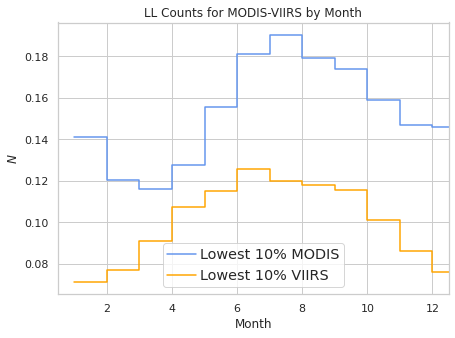

In [158]:
# Figure time
fig = plt.figure(figsize=(7, 5))
#plt.clf()
ax = plt.gca()

for H, clr, cat in zip([df_LL.mod_low10/df_LL.mod_all,df_LL.vir_low10/df_LL.vir_all], ['cornflowerblue','orange'], ['Lowest 10% MODIS','Lowest 10% VIIRS']):
    plt.step(bincentres_m, H, where='mid', color=clr, label='{}'.format(cat))

    # Labels
ax.set_ylabel(r'$N$')
ax.set_xlabel('Month')
#ax.set_yscale('log')
ax.minorticks_on()
plt.xlim(0.5,12.5)
plt.title('LL Counts for MODIS-VIIRS by Month')

legend = plt.legend(scatterpoints=1, borderpad=0.3, handletextpad=0.3, fontsize='large', numpoints=1)

# Layout and save
# plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
#plt.savefig(outfile, dpi=300)
plt.show()

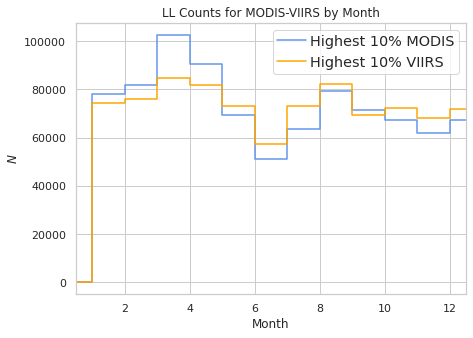

In [137]:
# Figure time
fig = plt.figure(figsize=(7, 5))
#plt.clf()
ax = plt.gca()

for H, clr, cat in zip([df_LL.mod_high10,df_LL.vir_high10], ['cornflowerblue','orange'], ['Highest 10% MODIS','Highest 10% VIIRS']):
    plt.step(bincentres_m, H, where='mid', color=clr, label='{}'.format(cat))

    # Labels
ax.set_ylabel(r'$N$')
ax.set_xlabel('Month')
#ax.set_yscale('log')
ax.minorticks_on()
plt.xlim(0.5,12.5)
plt.title('LL Counts for MODIS-VIIRS by Month')

legend = plt.legend(scatterpoints=1, borderpad=0.3, handletextpad=0.3, fontsize='large', numpoints=1)

# Layout and save
# plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
#plt.savefig(outfile, dpi=300)
plt.show()

## Fig_year_month

In [36]:
def fig_year_month(outfile, ptype, evals_tbl=None, frac=False,
                   all=False):
    """
    Time evolution in outliers
    Parameters
    ----------
    outfile
    ptype
    evals_tbl
    Returns
    -------
    """

    # Load
    if evals_tbl is None:
        evals_tbl = results.load_log_prob(ptype, feather=True)
        print("Loaded..")

    # Outliers
    point1 = int(0.001 * len(evals_tbl))
    isortLL = np.argsort(evals_tbl.LL)
    outliers = evals_tbl.iloc[isortLL[0:point1]]

    # All
    if all or frac:
        all_years = [item.year for item in evals_tbl.datetime]
        all_months = [item.month for item in evals_tbl.datetime]

    # Parse
    years = [item.year for item in outliers.datetime]
    months = [item.month for item in outliers.datetime]

    # Histogram
    bins_year = np.arange(2012.5, 2021.5)
    bins_month = np.arange(0.5, 13.5)

    counts, xedges, yedges = np.histogram2d(months, years,
                                            bins=(bins_month, bins_year))
    if all or frac:
        all_counts, _, _ = np.histogram2d(all_months, all_years,
                                            bins=(bins_month, bins_year))

    fig = plt.figure(figsize=(12, 8))
    plt.clf()
    gs = plt.GridSpec(5,6)

    # Total NSpax
    ax_tot = plt.subplot(gs[1:,1:-1])

    cm = plt.get_cmap('Blues')
    if frac:
        values  = counts.transpose()/all_counts.transpose()
        lbl = 'Fraction'
    elif all:
        cm = plt.get_cmap('Greens')
        norm = np.sum(all_counts) / np.product(all_counts.shape)
        values = all_counts.transpose()/norm
        lbl = 'Fraction (all)'
    else:
        values = counts.transpose()
        lbl = 'Counts'
    mplt = ax_tot.pcolormesh(xedges, yedges, values, cmap=cm)

    # Color bar
    cbaxes = fig.add_axes([0.03, 0.1, 0.05, 0.7])
    cb = plt.colorbar(mplt, cax=cbaxes, aspect=20)
    #cb.set_label(lbl, fontsize=20.)
    cbaxes.yaxis.set_ticks_position('left')
    cbaxes.set_xlabel(lbl, fontsize=15.)

    ax_tot.set_xlabel('Month')
    ax_tot.set_ylabel('Year')

    #ax_tot.set_fontsize(ax_tot, 19.)

    # Edges
    fsz = 30.
    months = np.mean(values, axis=0)
    ax_m = plt.subplot(gs[0,1:-1])
    ax_m.step(np.arange(12)+1, months, color='k', where='mid')
    #ax_m.set_fontsize(ax_m, fsz)
    #ax_m.minorticks_on()

    years = np.mean(values, axis=1)
    ax_y = plt.subplot(gs[1:,-1])
    ax_y.invert_xaxis()
    ax_y.step(years, 2013 + np.arange(8), color='k', where='mid')
    #ax_y.set_xlim(40,80)
    #ax_y.set_fontsize(ax_y, fsz)

    # Layout and save
    plt.tight_layout(pad=0.2,h_pad=0.2,w_pad=0.1)
    plt.show
    plt.savefig('mbyytest', dpi=600)
    #plt.close()
    #print('Wrote {:s}'.format(outfile))

In [6]:
viirs_tbl16 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_all_99clear_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_all_99clear_std.parquet


/tmp/ipykernel_4062/1094822457.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.2,h_pad=0.2,w_pad=0.1)


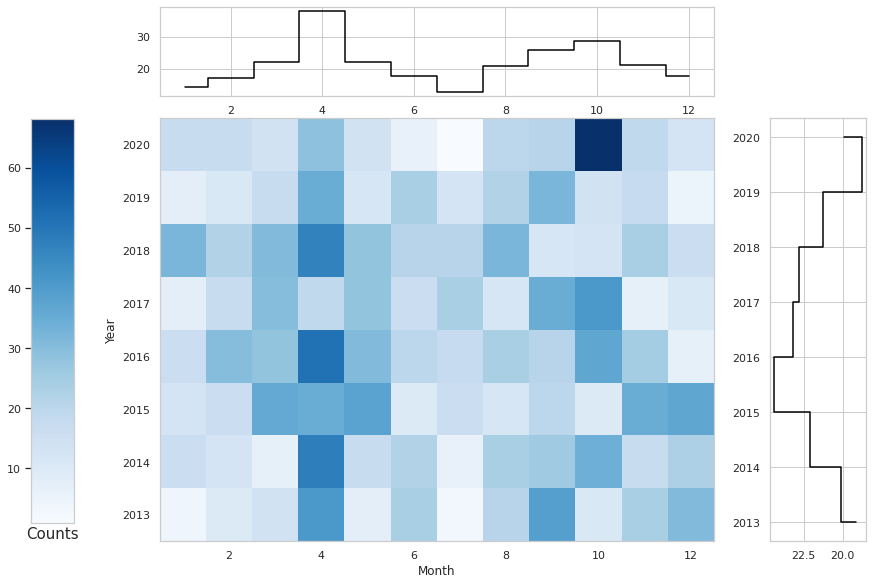

In [37]:
fig_year_month(outfile=viirs_tbl16, ptype='std', evals_tbl=viirs_tbl16)

In [3]:
import spatial_plots as sp

In [32]:
def fig_LL_vs_DT(ptype, outfile, evals_tbl=None):

    #sns.set_theme()
    #sns.set_style('whitegrid')
    #sns.set_context('paper')


    # Load
    if evals_tbl is None:
        evals_tbl = results.load_log_prob(ptype, feather=True)

    # Add in DT
    if 'DT' not in evals_tbl.keys():
        evals_tbl['DT'] = evals_tbl.T90 - evals_tbl.T10

    # Stats
    cut2 = np.abs(evals_tbl.DT.values-2.) < 0.05
    print("Min LL: {}".format(np.min(evals_tbl.LL[cut2])))
    print("Max LL: {}".format(np.max(evals_tbl.LL[cut2])))
    print("Mean LL: {}".format(np.mean(evals_tbl.LL[cut2])))
    print("RMS LL: {}".format(np.std(evals_tbl.LL[cut2])))

    # Bins
    bins_LL = np.linspace(-10000., 1100., 22)
    bins_DT = np.linspace(0., 14, 14)

    fig = plt.figure(figsize=(12, 8))
    plt.clf()
    gs = plt.GridSpec(1,1)

    # Total NSpax
    ax_tot = plt.subplot(gs[0])

    jg = sns.jointplot(data=evals_tbl, x='DT', y='LL',
        kind='hist', bins=200, marginal_kws=dict(bins=200))

    jg.ax_marg_x.set_xlim(0.5, 2.5)
    jg.ax_marg_y.set_ylim(0, 1000)
    jg.ax_joint.set_xlabel(r'$\Delta T$ (K)')
    jg.ax_joint.set_ylabel(r'LL')
    xmnx = (0., 14.5)
    jg.ax_joint.set_xlim(xmnx[0], xmnx[1])
    #ymnx = (-11400., 1700)
    #jg.ax_joint.set_ylim(ymnx[0], ymnx[1])
    jg.ax_joint.minorticks_on()

    # Horizontal line
    lowLL_val = np.percentile(evals_tbl.LL, 0.1)
    jg.ax_joint.plot(xmnx, [lowLL_val]*2, '--', color='gray')
    
    '''
    # Vertical lines
    jg.ax_joint.plot([2.]*2, ymnx, '-', color='gray', lw=1)
    jg.ax_joint.plot([2.1]*2, ymnx, '-', color='gray', lw=1)
    '''

    set_fontsize(jg.ax_joint, 17.)
    set_yaxis(jg.ax_joint,(0,-1000))

    #jg.ax_joint.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    #jg.ax_joint.xaxis.set_major_locator(plt.MultipleLocator(1.0)

    # 2D hist
    #hist2d(evals_tbl.log_likelihood.values, evals_tbl.DT.values,
    #       bins=[bins_LL, bins_DT], ax=ax_tot, color='b')

    #ax_tot.set_xlabel('LL')
    #ax_tot.set_ylabel(r'$\Delta T$')
    #ax_tot.set_ylim(0.3, 5.0)
    #ax_tot.minorticks_on()

    #legend = plt.legend(loc='upper right', scatterpoints=1, borderpad=0.3,
    #                    handletextpad=0.3, fontsize=19, numpoints=1)

    #set_fontsize(ax_tot, 19.)

    # Layout and save
    plt.tight_layout(pad=0.2,h_pad=0.,w_pad=0.1)
    plt.savefig(outfile, dpi=300)
    plt.close()
    print('Wrote {:s}'.format(outfile))


Min LL: -2526.65966796875
Max LL: 601.8599853515625
Mean LL: 42.499549865722656
RMS LL: 159.94476318359375


NameError: name 'set_fontsize' is not defined

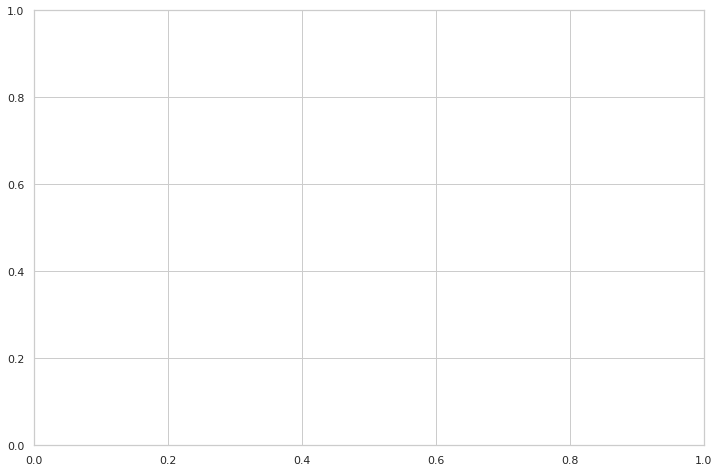

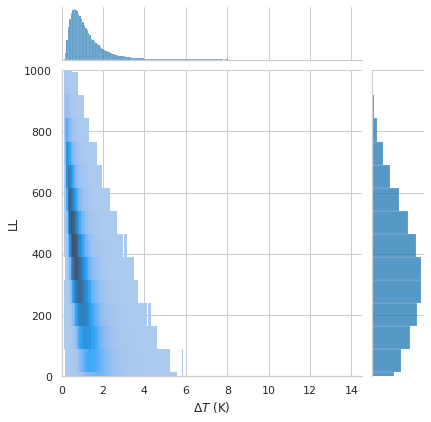

In [33]:
fig_LL_vs_DT(ptype='std', outfile=viirs_tbl, evals_tbl=viirs_tbl)
plt.savefig('outfile', dpi=300)

Read main table: s3://viirs/Tables/VIIRS_all_99clear_std.parquet


/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


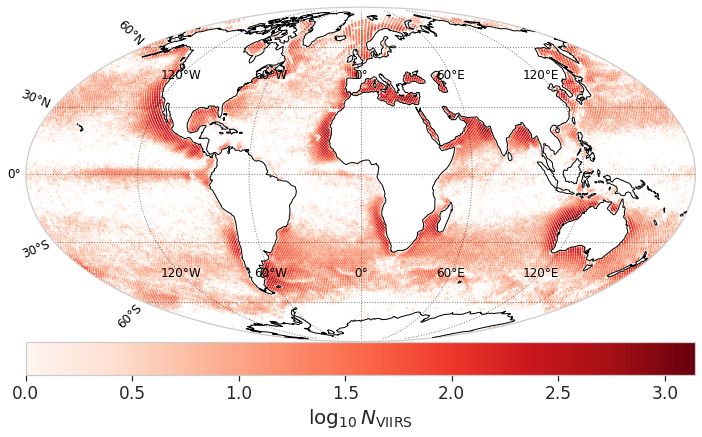

In [23]:

viirs_tbl = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_all_99clear_std.parquet')

test = ((viirs_tbl.T90 - viirs_tbl.T10 ) > 1) & ((viirs_tbl.T90 - viirs_tbl.T10 ) < 1.5) &
_ = ulmo_figs.show_spatial(viirs_tbl[test], lbl='VIIRS')

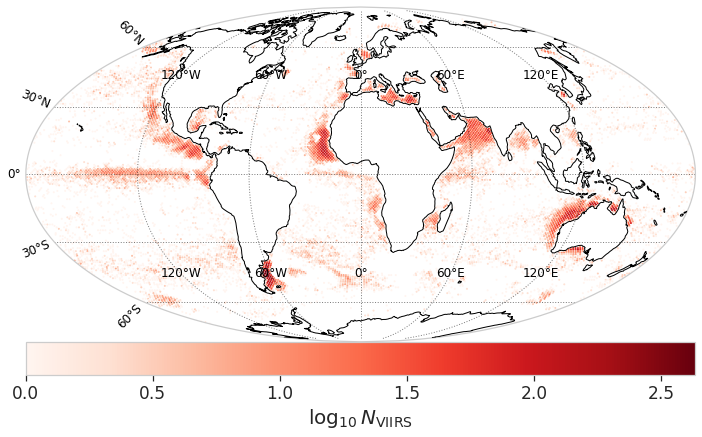

In [39]:
_ = ulmo_figs.show_spatial(viirs_tbl[high], lbl='VIIRS')

In [35]:
low = ((viirs_tbl.T90 - viirs_tbl.T10 ) > 1) & ((viirs_tbl.T90 - viirs_tbl.T10 ) < 1.5) & ((viirs_tbl.LL)>0) & ((viirs_tbl.LL)<200)
high = ((viirs_tbl.T90 - viirs_tbl.T10 ) > 1) & ((viirs_tbl.T90 - viirs_tbl.T10 ) < 1.5) & ((viirs_tbl.LL)>400) & ((viirs_tbl.LL)<600)

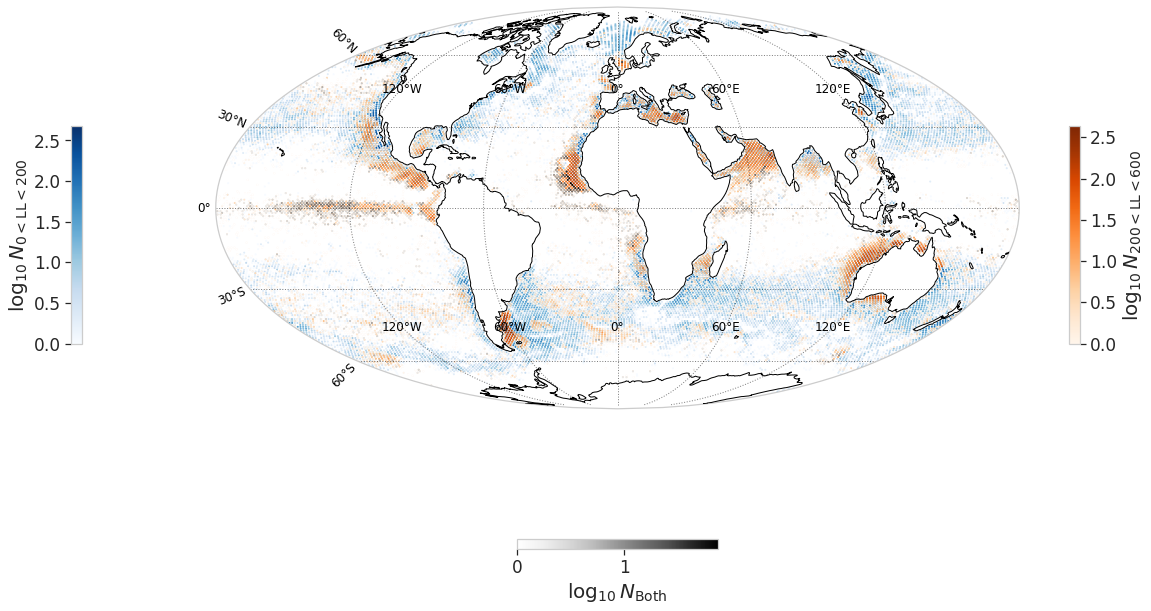

<GeoAxesSubplot:>

In [40]:
sp.show_spatial_diff(viirs_tbl[low],viirs_tbl[high],lbl1='0<LL<200',lbl2='200<LL<600',lbl3='Both')
